In [219]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [220]:
df = pd.read_csv("data/consommation-quotidienne-brute-regionale.csv", sep=";", index_col="date_heure", parse_dates = True)

In [221]:
df

,date,heure,code_insee_region,region,consommation_brute_gaz_grtgaz,statut_grtgaz,consommation_brute_gaz_terega,statut_terega,consommation_brute_gaz_totale,consommation_brute_electricite_rte,statut_rte,consommation_brute_totale
date_heure,,,,,,,,,,,,
2013-01-21 09:00:00+01:00,2013-01-21,09:00,11,Île-de-France,4129.0,Définitif,NaN,NaN,4129.0,13610,Définitif,17739.0
2013-01-21 09:00:00+01:00,2013-01-21,09:00,24,Centre-Val de Loire,4871.0,Définitif,NaN,NaN,4871.0,3589,Définitif,8460.0
2013-01-21 09:00:00+01:00,2013-01-21,09:00,44,Grand Est,17598.0,Définitif,NaN,NaN,17598.0,7306,Définitif,24904.0
2013-01-21 09:00:00+01:00,2013-01-21,09:00,76,Occitanie,2036.0,Définitif,4376.0,Définitif,6412.0,6722,Définitif,13134.0
2013-01-21 09:00:00+01:00,2013-01-21,09:00,84,Auvergne-Rhône-Alpes,14353.0,Définitif,94.0,Définitif,14447.0,10986,Définitif,25433.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-23 13:00:00+02:00,2023-06-23,13:00,76,Occitanie,281.0,Meilleur Statut,570.0,Définitif,851.0,4041,Consolidé,4892.0
2023-06-23 13:30:00+02:00,2023-06-23,13:30,24,Centre-Val de Loire,NaN,NaN,NaN,NaN,NaN,1761,Consolidé,NaN
2023-06-23 14:00:00+02:00,2023-06-23,14:00,44,Grand Est,3552.0,Meilleur Statut,NaN,NaN,3552.0,4548,Consolidé,8100.0


In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2207796 entries, 2013-01-21 09:00:00+01:00 to 2023-06-23 14:00:00+02:00
Data columns (total 12 columns):
 #   Column                              Dtype  
---  ------                              -----  
 0   date                                object 
 1   heure                               object 
 2   code_insee_region                   int64  
 3   region                              object 
 4   consommation_brute_gaz_grtgaz       float64
 5   statut_grtgaz                       object 
 6   consommation_brute_gaz_terega       float64
 7   statut_terega                       object 
 8   consommation_brute_gaz_totale       float64
 9   consommation_brute_electricite_rte  int64  
 10  statut_rte                          object 
 11  consommation_brute_totale           float64
dtypes: float64(4), int64(2), object(6)
memory usage: 219.0+ MB



    1. A l’aide de pandas et matplotlib, affichez la série temporelle en utilisant comme abscisse la date_heure.

In [223]:
df.index = pd.to_datetime(df.index, utc=True)
df_hdf = df[df['region'] == 'Hauts-de-France']

<Axes: xlabel='date_heure'>

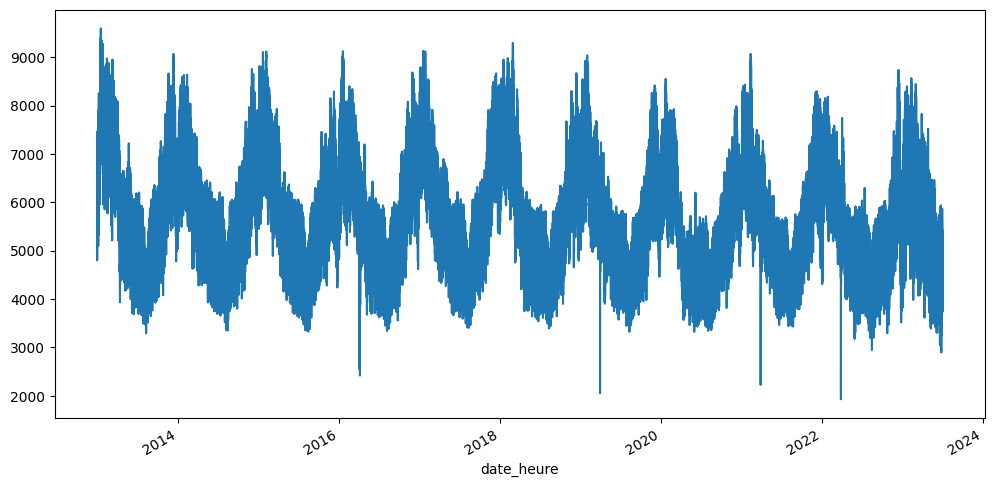

In [224]:
df_hdf['consommation_brute_electricite_rte'].plot(figsize=(12,6))

    2. Affichez cette même série temporelle en rassemblant:
        1. Par année
        2. Par trimestre
        3. Par mois
        4. Par semaine
        5. Par jour

<Axes: xlabel='date_heure'>

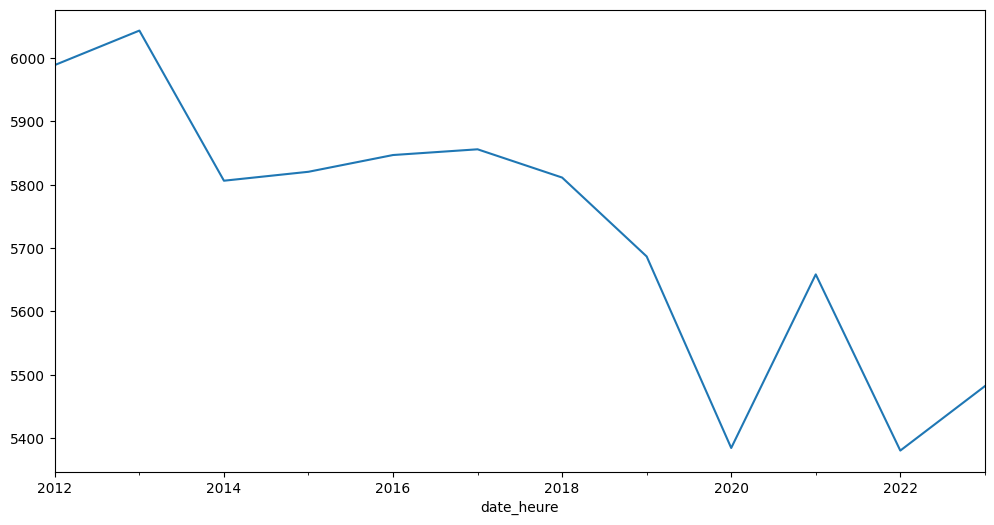

In [225]:
df_hdf['consommation_brute_electricite_rte'].resample("Y").mean().plot(figsize=(12,6))

<Axes: xlabel='date_heure'>

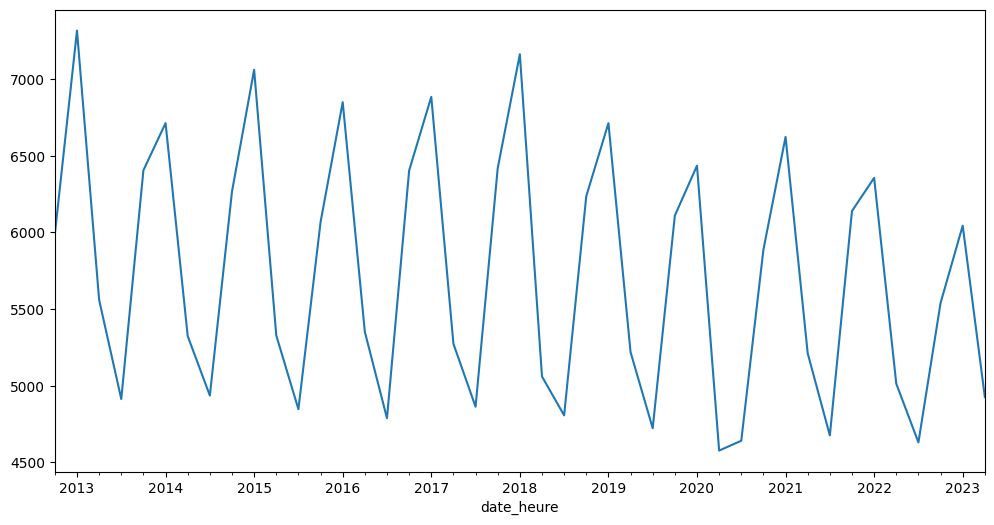

In [226]:
df_hdf['consommation_brute_electricite_rte'].resample("Q").mean().plot(figsize=(12,6))

<Axes: xlabel='date_heure'>

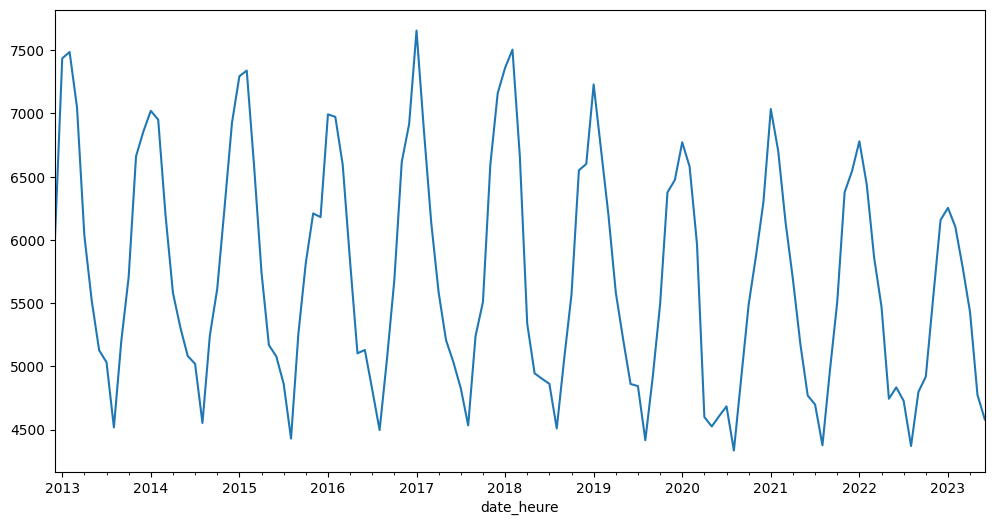

In [227]:
df_hdf['consommation_brute_electricite_rte'].resample("M").mean().plot(figsize=(12,6))

<Axes: xlabel='date_heure'>

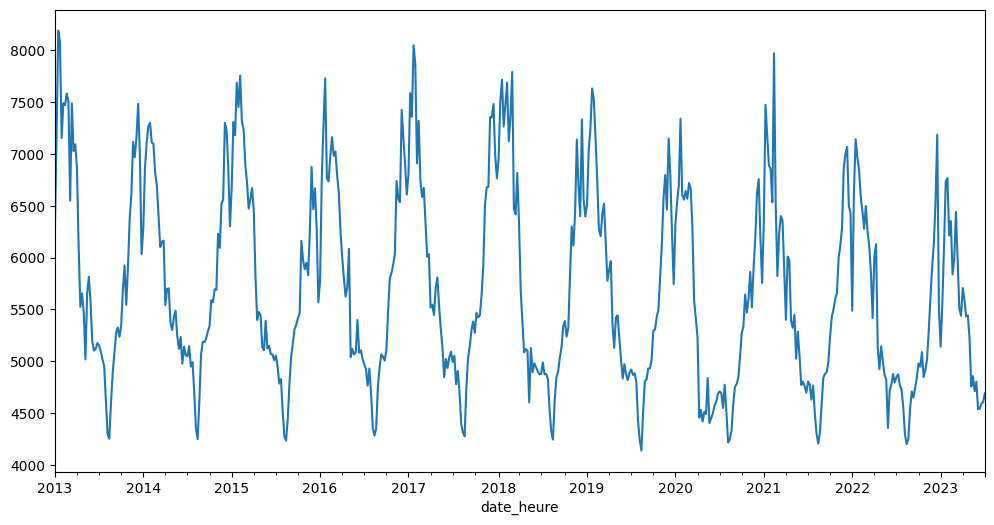

In [228]:
df_hdf['consommation_brute_electricite_rte'].resample("W").mean().plot(figsize=(12,6))

<Axes: xlabel='date_heure'>

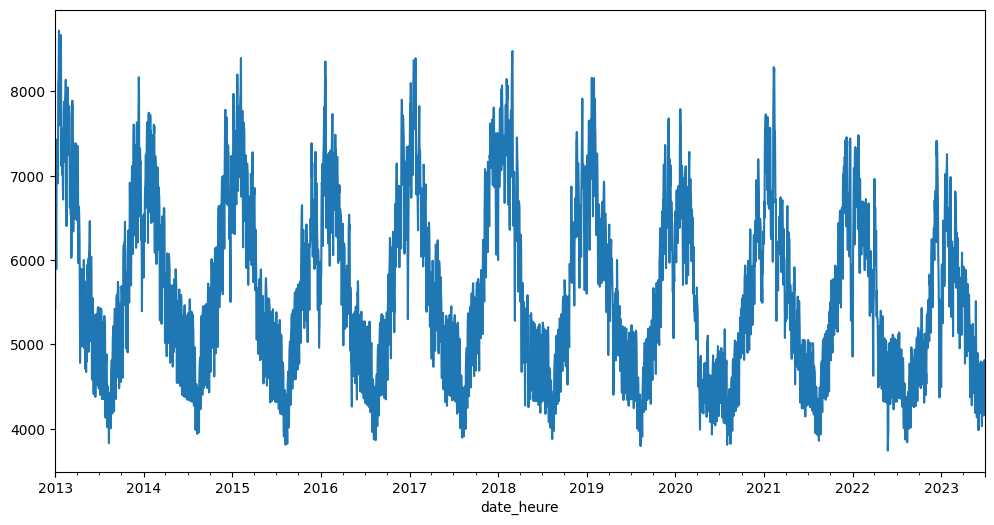

In [229]:
df_hdf['consommation_brute_electricite_rte'].resample("D").mean().plot(figsize=(12,6))

In [230]:
df["consommation_brute_electricite_rte"].resample("D").mean().to_csv("data/hdf_journalier.csv")

In [231]:
df_jour = df["consommation_brute_electricite_rte"].resample("D").mean()

         
    3. A partir de la time série agrégée à la journée, créez une moyenne mobile sur une semaine, centrée et symétrique.

<Axes: xlabel='date_heure'>

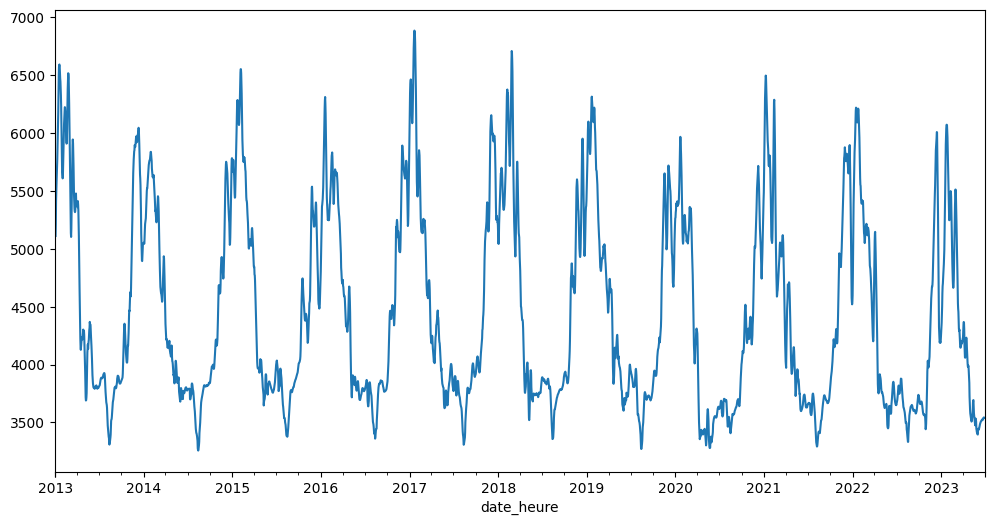

In [232]:
df_jour.rolling(window=7, center=True,win_type=None).mean().plot(figsize=(12,6))

     
    4. Quelle est la différence entre la moyenne mobile et les agrégations précédentes?

L'agrégation diminue le nombre de point en regroupant alors que la moyenne mobile garde le nombre de point inchangé.
La moyenne mobile a pour effet de:
- lisser la série temporelle
- enlever la saisonnalité

     
    5. A l’aide de box-plots, observez la saisonnalité:
        1. trimestrielle (chaque trimestre)
        2. mensuelle (chaque mois)
        3. hebdomadaire (chaque jour)
        4. journalière (chaque heure)

In [233]:
df_jour =  df_jour.to_frame()

In [234]:
df_jour['date'] =  df_jour.index


In [235]:
df_jour['year'] =  df_jour['date'].dt.year
df_jour['quarter'] =  df_jour['date'].dt.quarter
df_jour['month'] =  df_jour['date'].dt.strftime('%b')
df_jour['day_of_week'] =  df_jour['date'].dt.strftime('%A')

In [236]:
df['date'] = df.index
df['hour'] = df['date'].dt.hour


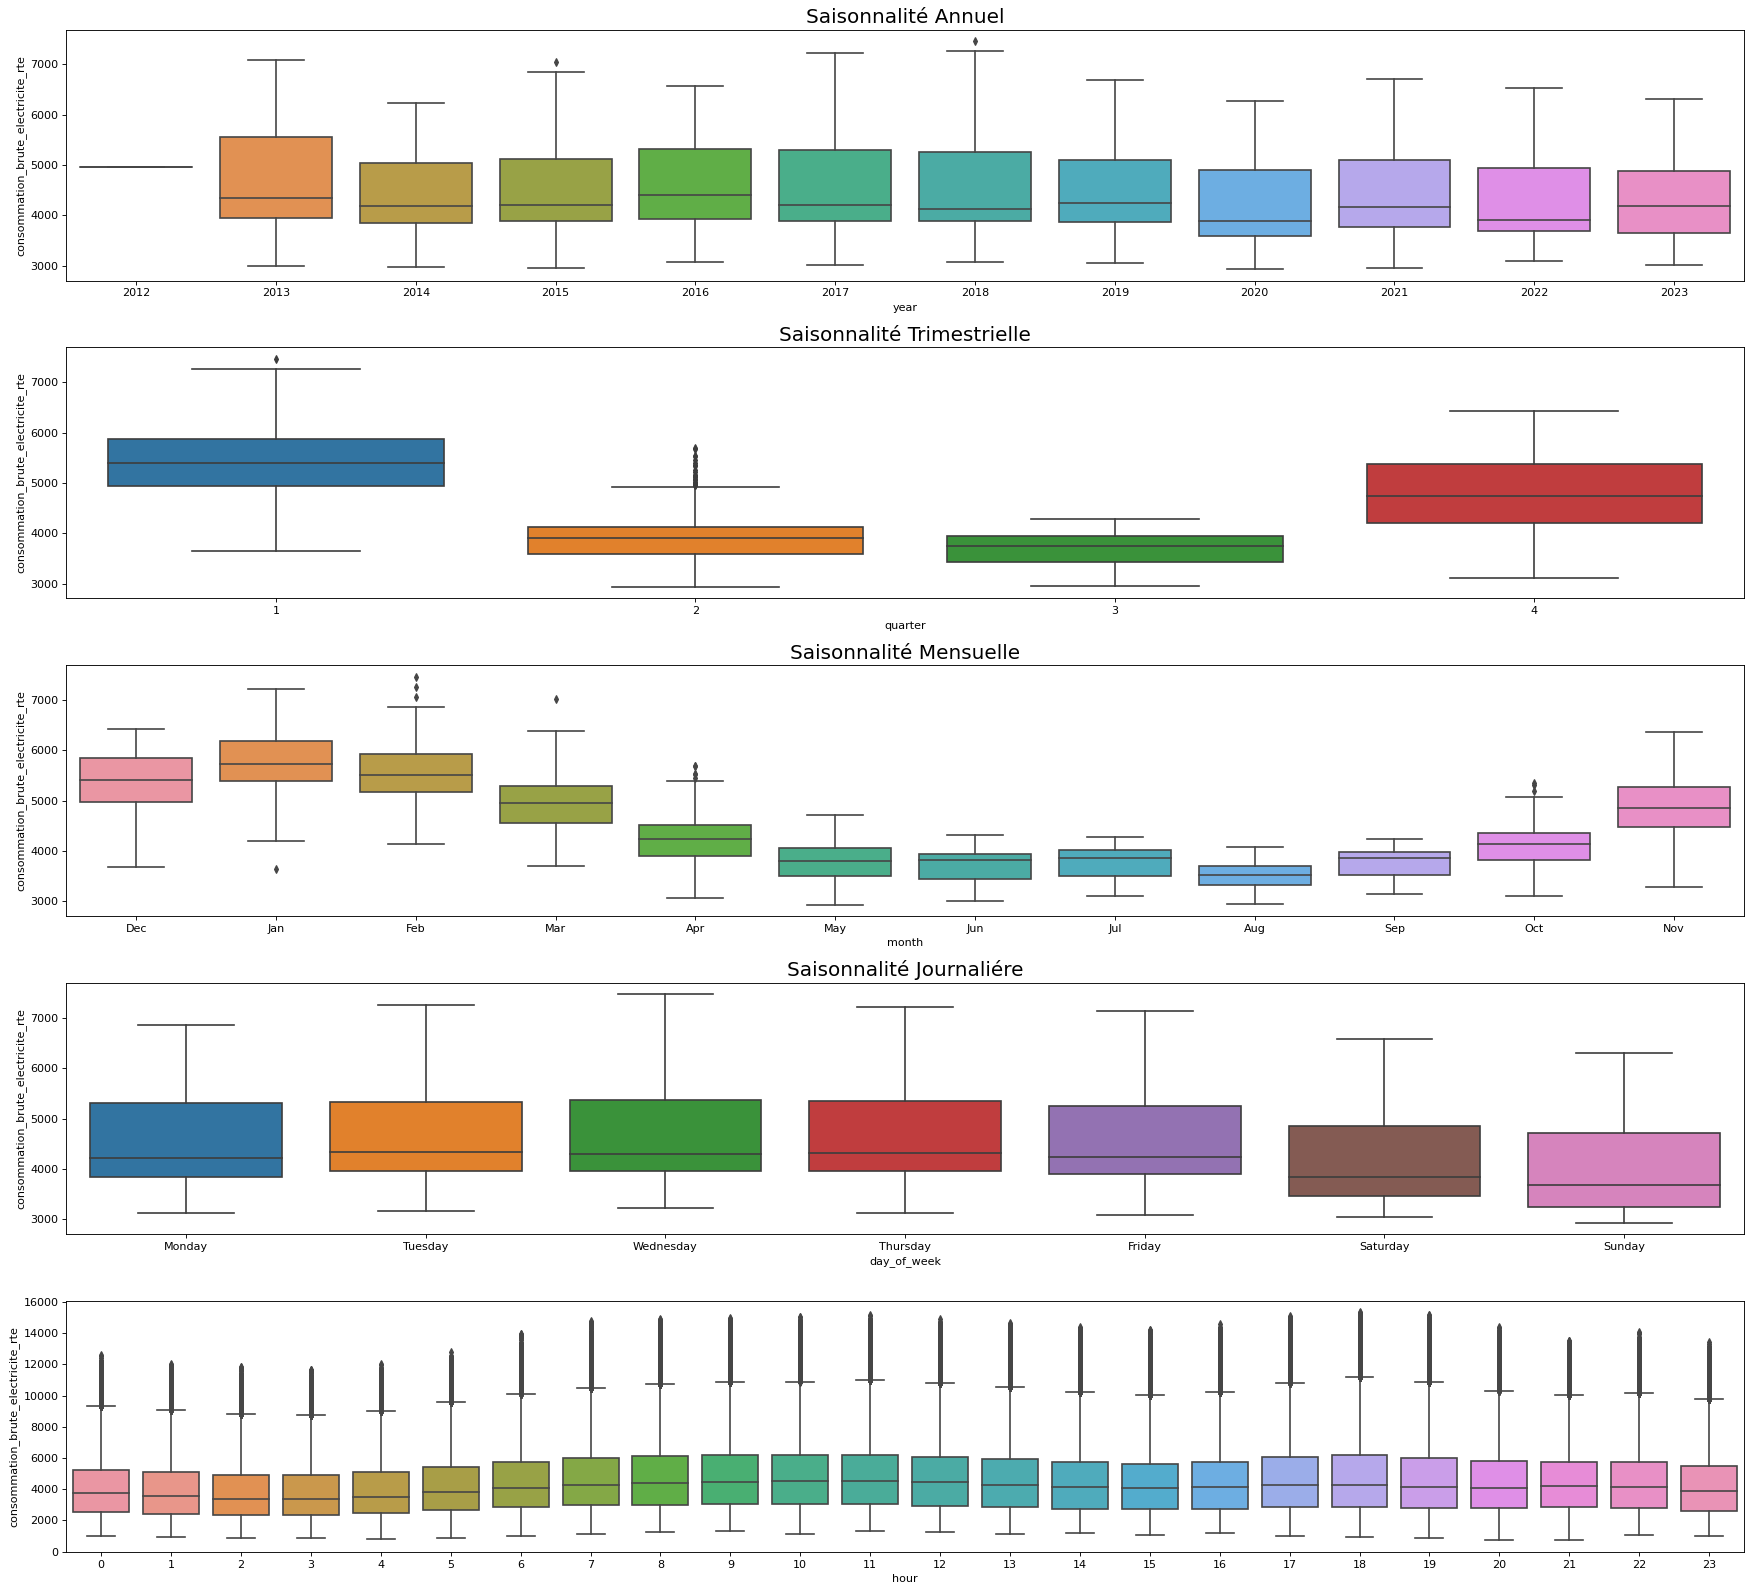

In [237]:
fig, axes = plt.subplots(5, 1, figsize=(22, 20), dpi=80)

sns.boxplot(x='year', y='consommation_brute_electricite_rte', data= df_jour, ax=axes[0])
axes[0].set_title('Saisonnalité Annuel', fontsize=18)

sns.boxplot(x='quarter', y='consommation_brute_electricite_rte', data= df_jour, ax=axes[1])
axes[1].set_title('Saisonnalité Trimestrielle', fontsize=18)

sns.boxplot(x='month', y='consommation_brute_electricite_rte', data= df_jour, ax=axes[2])
axes[2].set_title('Saisonnalité Mensuelle', fontsize=18)

sns.boxplot(x='day_of_week', y='consommation_brute_electricite_rte', data= df_jour, ax=axes[3])
axes[3].set_title('Saisonnalité Hébdomadaire', fontsize=18)

sns.boxplot(x='hour', y='consommation_brute_electricite_rte', data=df, ax=axes[4])
axes[3].set_title('Saisonnalité Journaliére', fontsize=18)

plt.tight_layout()
plt.show()


    6. Qu’est ce que la stationnarité? 

-  quand un modéle suit un tendance qui se répéte a des moments précis comme chaque année chaque mois jours etc...



    7. Visuellement, pour vous la time serie est-elle stationnaire ou non stationnaire? 


- visuelement la time-series est non stationnaire 

     
    8. Réalisez un test de Dickey Fuller, quelle est l’hypothèse nulle et l’hypothèse alternative, quelle est la statistique calculée et quelle distribution théorique suit elle d’après l’hypothèse nulle. Quelle est la probabilité que la statistique sous l’hypothèse H0 prenne un valeur aussi extrême voir plus extrême? 

In [238]:
from statsmodels.tsa.stattools import adfuller

df_jour = df_hdf['consommation_brute_electricite_rte'].resample('D').mean() 

result = adfuller(df_jour.dropna())

print('Statistique de test :', result[0])
print('Valeur p :', result[1])
print('Valeurs critiques :', result[4])

Statistique de test : -4.236425652702576
Valeur p : 0.0005713466895179795
Valeurs critiques : {'1%': -3.432070672988693, '5%': -2.8623002987378547, '10%': -2.567174716967499}


- Hypothèse nulle (H0) : La série temporelle n'est pas stationnaire.

- Hypothèse alternative (H1) : La série temporelle est stationnaire.

- La statistique de test calculée est -4.236.

- Valeur p : La valeur p est 0.000571. est extrêmement faible, signifiant qu'il est improbable de voir une statistique de test aussi extrême que -4.236 sous l'hypothèse nulle. donc on rejete l'hypothèse nulle, la série est probablement stationnaire.

<Axes: xlabel='date_heure'>

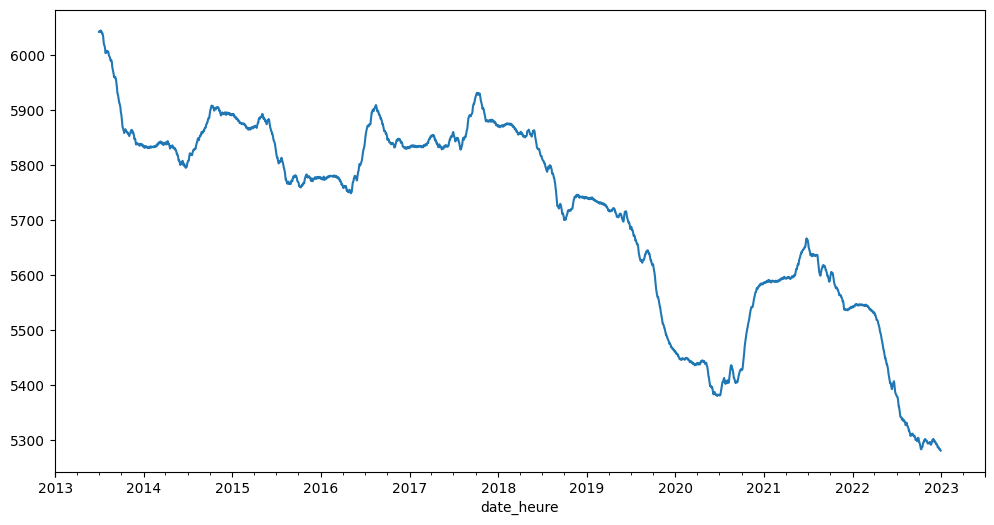

In [239]:
df_jour.rolling(window=365,center=True, win_type=None).mean().plot(figsize=(12,6))

     
    9. Pour vous la série temporelle est plutôt additive ou multiplicative? 

- la série temporelle est plutot additive 